# Import data

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install PyTDC

In [ ]:
pip install rdkit-pypi

In [137]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')

benchmark = group.get('caco2_wang')

train_val, test = benchmark['train_val'], benchmark['test']

Found local copy...


In [138]:
train, valid = group.get_train_valid_split(benchmark = 'caco2_wang', split_type = 'default', seed = 1)

generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2401.36it/s]


In [139]:
print(train.shape)
train.head(3)

(637, 3)


,Drug_ID,Drug,Y
0,PNU-184435,CC(=S)NC[C@H]1CN(c2ccc(N3CCCS(=O)CC3)c(F)c2)C(...,-5.338621
1,Valsartan,CCCCC(=O)N(Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1)[C@...,-6.260000
2,1,CCCN(Cc1ccoc1)C(=O)c1cc(C)cc(OCC2(CON=C(N)N)CC...,-5.387216


In [140]:
print(valid.shape)
valid.head(3)

(91, 3)


,Drug_ID,Drug,Y
0,Bis(7)-tacrine (B7T),c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...,-5.441246
1,Terfenadine,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,-5.260000
2,fexofenadine,CC(C)(C(=O)O)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)...,-6.510000


In [141]:
print(test.shape)
test.head(3)

(182, 3)


,Drug_ID,Drug,Y
0,I-II,O=C(O)C[C@@H](c1cnc2ccccc2c1)N1CC[C@@H](CCCc2c...,-5.690000
1,aceclofenac,O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,-4.410000
2,Diclofenac,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,-4.460681


# Features extract

In [142]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [143]:
def molecular_descriptors(table):

  descriptors = pd.DataFrame()

  mol = [Chem.MolFromSmiles(drug) for drug in table.Drug]

  # Exact molecular weight of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.ExactMolWt(i) for i in mol])
  descriptors['Exact_MW'] = Nilavo[0]

  # FpDensityMorgan1
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan1(i) for i in mol])
  descriptors['FpDensityMorgan1'] = Nilavo[0]

  # FpDensityMorgan2
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan2(i) for i in mol])
  descriptors['FpDensityMorgan2'] = Nilavo[0]

  # FpDensityMorgan3
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan3(i) for i in mol])
  descriptors['FpDensityMorgan3'] = Nilavo[0]

  # Average molecular weight of the molecule ignoring hydrogens
  Nilavo = []
  Nilavo.append([Descriptors.HeavyAtomMolWt(i) for i in mol])
  descriptors['HeavyAtomMolWt'] = Nilavo[0]

  # MaxAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxAbsPartialCharge(i) for i in mol])
  descriptors['MaxAbsPartialCharge'] = Nilavo[0]

  # MaxPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxPartialCharge(i) for i in mol])
  descriptors['MaxPartialCharge'] = Nilavo[0]

  # MinAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinAbsPartialCharge(i) for i in mol])
  descriptors['MinAbsPartialCharge'] = Nilavo[0]

  # MinPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinPartialCharge(i) for i in mol])
  descriptors['MinPartialCharge'] = Nilavo[0]

  # Average molecular weight of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.MolWt(i) for i in mol])
  descriptors['MolWt'] = Nilavo[0]

  # Number of radical electrons of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.NumRadicalElectrons(i) for i in mol])
  descriptors['NumRadicalElectrons'] = Nilavo[0]

  # Number of valence electrons of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.NumValenceElectrons(i) for i in mol])
  descriptors['NumValenceElectrons'] = Nilavo[0]

  # Log of partition coefficient
  Nilavo = []
  Nilavo.append([Descriptors.MolLogP(i) for i in mol])
  descriptors['Partition_Coefficient'] = Nilavo[0]


  ### Lipinski Descriptors ###
  # Fraction of C atoms that are SP3 hybridized
  Nilavo = []
  Nilavo.append([Lipinski.FractionCSP3(i) for i in mol])
  descriptors['FractionCSP3'] = Nilavo[0]

  # Number of heavy atoms a molecule
  Nilavo = []
  Nilavo.append([Lipinski.HeavyAtomCount(i) for i in mol])
  descriptors['Heavy_atoms'] = Nilavo[0]

  # Number of NHs or OHs
  Nilavo = []
  Nilavo.append([Lipinski.NHOHCount(i) for i in mol])
  descriptors['NHs/OHs'] = Nilavo[0]

  # Number of Nitrogens and Oxygens
  Nilavo = []
  Nilavo.append([Lipinski.NOCount(i) for i in mol])
  descriptors['N&O'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticCarbocycles(i) for i in mol])
  descriptors['Aliphatic_carbocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticHeterocycles(i) for i in mol])
  descriptors['Aliphatic_heterocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticRings(i) for i in mol])
  descriptors['Aliphatic_rings'] = Nilavo[0]

  # Nmber of aromatic carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticCarbocycles(i) for i in mol])
  descriptors['Aromatic_carbocycles'] = Nilavo[0]

  # Number of aromatic heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticHeterocycles(i) for i in mol])
  descriptors['Aromatic_heterocycles'] = Nilavo[0]

  # Number of aromatic rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticRings(i) for i in mol])
  descriptors['Aromatic_rings'] = Nilavo[0]

  # Number of Hydrogen Bond Acceptors
  Nilavo = []
  Nilavo.append([Lipinski.NumHAcceptors(i) for i in mol])
  descriptors['HAcceptors'] = Nilavo[0]

  # Number of Hydrogen Bond Donors
  Nilavo = []
  Nilavo.append([Lipinski.NumHDonors(i) for i in mol])
  descriptors['HDonors'] = Nilavo[0]

  # Number of Heteroatoms
  Nilavo = []
  Nilavo.append([Lipinski.NumHeteroatoms(i) for i in mol])
  descriptors['Heteroatoms'] = Nilavo[0]

  # Number of Rotatable Bonds
  Nilavo = []
  Nilavo.append([Lipinski.NumRotatableBonds(i) for i in mol])
  descriptors['Rotatable_Bonds'] = Nilavo[0]

  # Number of saturated carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedCarbocycles(i) for i in mol])
  descriptors['Saturated_Carbocycles'] = Nilavo[0]

  # Number of saturated heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedHeterocycles(i) for i in mol])
  descriptors['Saturated_Heterocycles'] = Nilavo[0]

  # Number of saturated rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedRings(i) for i in mol])
  descriptors['Saturated_Rings'] = Nilavo[0]

  # Number of rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.RingCount(i) for i in mol])
  descriptors['Rings'] = Nilavo[0]

  return descriptors

In [144]:
train_x = molecular_descriptors(train)
valid_x = molecular_descriptors(valid)
test_x = molecular_descriptors(test)

In [145]:
print(train_x.shape)
train_x.head(3)

(637, 31)


,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,399.108662,1.423077,2.230769,2.961538,377.337,0.442048,0.414316,0.414316,-0.442048,399.513,...,0,1,5,1,9,4,0,2,2,3
1,435.227040,1.062500,1.750000,2.312500,406.296,0.479704,0.326196,0.326196,-0.479704,435.528,...,1,3,5,2,8,10,0,0,0,3
2,414.226705,1.266667,2.066667,2.700000,384.266,0.492845,0.253801,0.253801,-0.492845,414.506,...,1,2,5,2,8,11,1,0,1,3


In [146]:
print(valid_x.shape)
valid_x.head(3)

(91, 31)


,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,492.325297,0.513514,0.945946,1.459459,452.391,0.384222,0.072579,0.072579,-0.384222,492.711,...,2,4,4,2,4,10,0,0,0,6
1,471.313730,0.771429,1.285714,1.771429,430.357,0.388421,0.117482,0.117482,-0.388421,471.685,...,0,3,3,2,3,8,0,1,1,4
2,501.287909,0.864865,1.378378,1.864865,462.355,0.480590,0.313046,0.313046,-0.480590,501.667,...,0,3,4,3,5,10,0,1,1,4


In [147]:
print(test_x.shape)
test_x.head(3)

(182, 31)


,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,458.231791,1.235294,2.117647,3.000000,428.322,0.481165,0.305296,0.305296,-0.481165,458.562,...,2,3,5,2,7,8,0,1,1,5
1,353.022163,1.043478,1.695652,2.347826,341.085,0.478722,0.341344,0.341344,-0.478722,354.189,...,0,2,4,2,7,6,0,0,0,2
2,295.016684,1.052632,1.684211,2.315789,285.065,0.480985,0.307396,0.307396,-0.480985,296.153,...,0,2,2,2,5,4,0,0,0,2


In [148]:
# Check correlation between each feature column and target column(Y)
corr = []
for col in train_x.columns:
  corr.append(train_x[col].corr(train['Y']))

In [149]:
nilavo = pd.Series(corr, index= train_x.columns)
nilavo.sort_values(ascending=False, inplace=True)
nilavo

Partition_Coefficient     0.304081
MinPartialCharge          0.227432
FpDensityMorgan1          0.165380
FpDensityMorgan2          0.110089
FpDensityMorgan3          0.036339
Aliphatic_carbocycles    -0.024053
Saturated_Carbocycles    -0.028793
Aromatic_heterocycles    -0.069821
FractionCSP3             -0.073587
MaxPartialCharge         -0.076998
MinAbsPartialCharge      -0.103457
Aliphatic_rings          -0.146613
Saturated_Rings          -0.159208
Aromatic_carbocycles     -0.172790
Aliphatic_heterocycles   -0.178366
Aromatic_rings           -0.185226
Saturated_Heterocycles   -0.193003
MaxAbsPartialCharge      -0.199250
Rings                    -0.251389
Rotatable_Bonds          -0.265858
NumValenceElectrons      -0.367936
Heavy_atoms              -0.368199
MolWt                    -0.369353
Exact_MW                 -0.369555
HeavyAtomMolWt           -0.375244
HAcceptors               -0.416295
Heteroatoms              -0.495932
N&O                      -0.549796
NHs/OHs             

In [150]:
# Drop uninformative features

train_x.drop(columns=['NumRadicalElectrons', 'FpDensityMorgan3', 'Aliphatic_carbocycles', 'Saturated_Carbocycles', 'Aromatic_heterocycles', 'FractionCSP3', 'MaxPartialCharge'], inplace = True)
valid_x.drop(columns=['NumRadicalElectrons', 'FpDensityMorgan3', 'Aliphatic_carbocycles', 'Saturated_Carbocycles', 'Aromatic_heterocycles', 'FractionCSP3', 'MaxPartialCharge'], inplace = True)
test_x.drop(columns=['NumRadicalElectrons', 'FpDensityMorgan3', 'Aliphatic_carbocycles', 'Saturated_Carbocycles', 'Aromatic_heterocycles', 'FractionCSP3', 'MaxPartialCharge'], inplace = True)

In [151]:
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(637, 24)
(91, 24)
(182, 24)


In [152]:
y_train = train.Y
y_valid = valid.Y
y_test = test.Y

# Build ML model

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

In [154]:
lin = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(random_state=0)
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0)
forest = RandomForestRegressor(random_state=0)
et = ExtraTreesRegressor(random_state=0)
grad = GradientBoostingRegressor(random_state=0)
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0),random_state=0)

In [155]:
MAE = []
R2 = []
for i in (lin, knn, svr, tree, bag, forest, et, grad, ada):
  i.fit(train_x, y_train)
  y_valid_pred = i.predict(valid_x)
  
  R2.append(r2(y_valid, y_valid_pred))
  MAE.append(mae(y_valid, y_valid_pred))

In [156]:
R2

[0.530307891149914,
 0.28014202721134607,
 0.2413038692539875,
 0.16496059705847133,
 0.6858466362131868,
 0.6732770616933882,
 0.6640016206181529,
 0.637441350292111,
 0.6699244866948235]

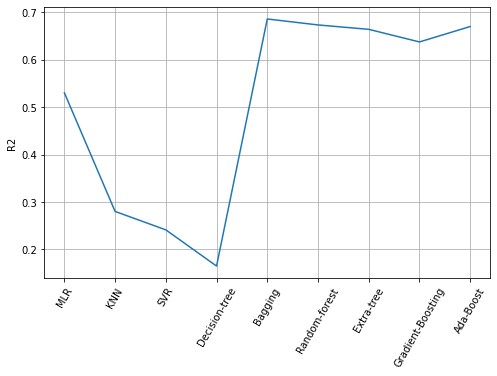

In [157]:
pd.Series(R2, index=('MLR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Extra-tree', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('R2')
plt.show()

In [158]:
MAE

[0.4520333172784981,
 0.5090296041758242,
 0.5275834449288375,
 0.5552873637362638,
 0.3396980204798533,
 0.35456835578100476,
 0.3521024621575095,
 0.3792016962985977,
 0.3522894633699632]

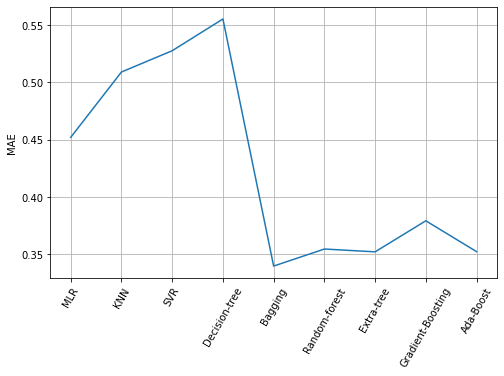

In [159]:
pd.Series(MAE, index=('MLR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Extra-tree', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('MAE')
plt.show()

I can easily see, Bagging, Random-forest, Extra-tree, Gradient-Boosting and Ada-Boost this 5 models gives best statistical results. So, I will try to tune parameters of this models to get better results.

## Bagging parameter tuning

In [160]:
e = []
for i in np.arange(50,500,50):   
  bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = i)
  bag.fit(train_x, y_train)
  y_valid_pred = bag.predict(valid_x)

  e.append(mae(y_valid, y_valid_pred))

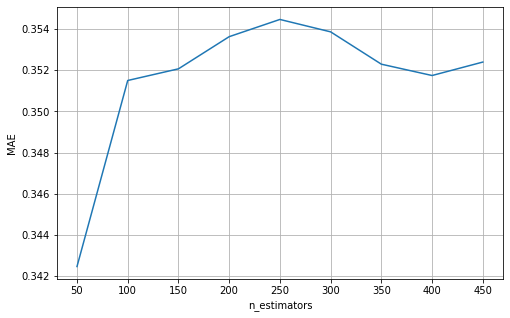

In [161]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [162]:
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators = 50, random_state=0)

bag.fit(train_x, y_train)
y_valid_pred = bag.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3424491014963369

## Random-forest parameter tuning

In [163]:
e = []
for i in np.arange(50,500,50):   
  rf = RandomForestRegressor(random_state=0, n_estimators = i)
  rf.fit(train_x, y_train)
  y_valid_pred = rf.predict(valid_x)

  e.append(mae(y_valid, y_valid_pred))

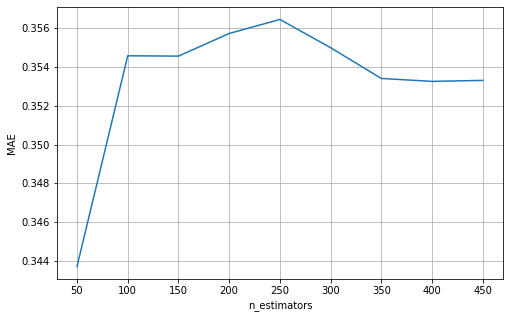

In [164]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [165]:
rf = RandomForestRegressor(n_estimators = 50, random_state=0)

rf.fit(train_x, y_train)
y_valid_pred = rf.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3437185007534796

##Extra-tree parameter tuning

In [166]:
e = []
for i in np.arange(50,500,50):   
  et = ExtraTreesRegressor(random_state=0, n_estimators = i)
  et.fit(train_x, y_train)
  y_valid_pred = bag.predict(valid_x)

  e.append(mae(y_valid, y_valid_pred))

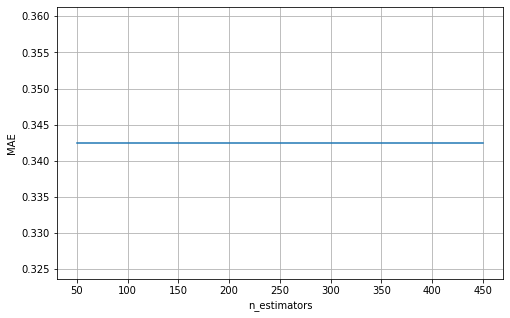

In [167]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

In [168]:
et = ExtraTreesRegressor(random_state=0)

et.fit(train_x, y_train)
y_valid_pred = et.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3521024621575095

##Gradient-Boosting parameter tuning

In [169]:
e = []
for i in np.arange(50,500,50):
  for j in np.arange(0.1, 0.5, 0.1):   
    grad = GradientBoostingRegressor(random_state=0, n_estimators = i, learning_rate = j)
    grad.fit(train_x, y_train)
    y_valid_pred = grad.predict(valid_x)

    e.append(mae(y_valid, y_valid_pred))

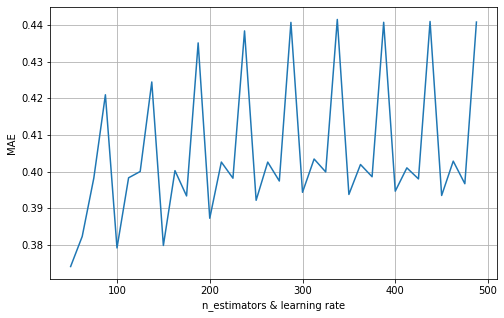

In [170]:
pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators & learning rate')
plt.ylabel('MAE')
plt.show()

In [171]:
grad = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0)

grad.fit(train_x, y_train)
y_valid_pred = grad.predict(valid_x)

mae(y_valid, y_valid_pred)

0.37412868672069466

##Ada-Boost parameter tuning

In [172]:
e = []
for i in np.arange(50,500,50):
  for j in np.arange(0.1, 0.5, 0.1): 
    ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = i, learning_rate = 0.1)
    ada.fit(train_x, y_train)
    y_valid_pred = ada.predict(valid_x)

    e.append(mae(y_valid, y_valid_pred))

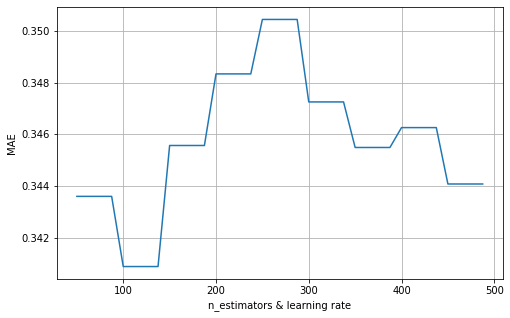

In [173]:
pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators & learning rate')
plt.ylabel('MAE')
plt.show()

In [174]:
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = 100, learning_rate = 0.1)

ada.fit(train_x, y_train)
y_valid_pred = ada.predict(valid_x)

mae(y_valid, y_valid_pred)

0.3408965025339482

## Results after tuning

In [175]:
### MAE

# 0.3424  bag
# 0.3437  rf
# 0.3521  et
# 0.3741  grad
# 0.3408  ada

Here, Ada-Boost model with n_estimator=100 & learning_rate=0.1 gives lowest MAE on the validation set.

In [176]:
# save best model
import pickle

pickle.dump(ada,open('Nilavo.pkl','wb'))

# Using my Best Model to predict on the test set

In [177]:
# Importent features extractor function

def useful_molecular_descriptors(table):

  descriptors = pd.DataFrame()

  mol = [Chem.MolFromSmiles(drug) for drug in table.Drug]

  # Exact molecular weight of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.ExactMolWt(i) for i in mol])
  descriptors['Exact_MW'] = Nilavo[0]

  # FpDensityMorgan1
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan1(i) for i in mol])
  descriptors['FpDensityMorgan1'] = Nilavo[0]

  # FpDensityMorgan2
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan2(i) for i in mol])
  descriptors['FpDensityMorgan2'] = Nilavo[0]

  # Average molecular weight of the molecule ignoring hydrogens
  Nilavo = []
  Nilavo.append([Descriptors.HeavyAtomMolWt(i) for i in mol])
  descriptors['HeavyAtomMolWt'] = Nilavo[0]

  # MaxAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxAbsPartialCharge(i) for i in mol])
  descriptors['MaxAbsPartialCharge'] = Nilavo[0]

  # MinAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinAbsPartialCharge(i) for i in mol])
  descriptors['MinAbsPartialCharge'] = Nilavo[0]

  # MinPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinPartialCharge(i) for i in mol])
  descriptors['MinPartialCharge'] = Nilavo[0]

  # Average molecular weight of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.MolWt(i) for i in mol])
  descriptors['MolWt'] = Nilavo[0]

  # Number of valence electrons of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.NumValenceElectrons(i) for i in mol])
  descriptors['NumValenceElectrons'] = Nilavo[0]

  # Log of partition coefficient
  Nilavo = []
  Nilavo.append([Descriptors.MolLogP(i) for i in mol])
  descriptors['Partition_Coefficient'] = Nilavo[0]


  ### Lipinski Descriptors ###

  # Number of heavy atoms a molecule
  Nilavo = []
  Nilavo.append([Lipinski.HeavyAtomCount(i) for i in mol])
  descriptors['Heavy_atoms'] = Nilavo[0]

  # Number of NHs or OHs
  Nilavo = []
  Nilavo.append([Lipinski.NHOHCount(i) for i in mol])
  descriptors['NHs/OHs'] = Nilavo[0]

  # Number of Nitrogens and Oxygens
  Nilavo = []
  Nilavo.append([Lipinski.NOCount(i) for i in mol])
  descriptors['N&O'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticHeterocycles(i) for i in mol])
  descriptors['Aliphatic_heterocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticRings(i) for i in mol])
  descriptors['Aliphatic_rings'] = Nilavo[0]

  # Nmber of aromatic carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticCarbocycles(i) for i in mol])
  descriptors['Aromatic_carbocycles'] = Nilavo[0]

  # Number of aromatic rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticRings(i) for i in mol])
  descriptors['Aromatic_rings'] = Nilavo[0]

  # Number of Hydrogen Bond Acceptors
  Nilavo = []
  Nilavo.append([Lipinski.NumHAcceptors(i) for i in mol])
  descriptors['HAcceptors'] = Nilavo[0]

  # Number of Hydrogen Bond Donors
  Nilavo = []
  Nilavo.append([Lipinski.NumHDonors(i) for i in mol])
  descriptors['HDonors'] = Nilavo[0]

  # Number of Heteroatoms
  Nilavo = []
  Nilavo.append([Lipinski.NumHeteroatoms(i) for i in mol])
  descriptors['Heteroatoms'] = Nilavo[0]

  # Number of Rotatable Bonds
  Nilavo = []
  Nilavo.append([Lipinski.NumRotatableBonds(i) for i in mol])
  descriptors['Rotatable_Bonds'] = Nilavo[0]

  # Number of saturated heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedHeterocycles(i) for i in mol])
  descriptors['Saturated_Heterocycles'] = Nilavo[0]

  # Number of saturated rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedRings(i) for i in mol])
  descriptors['Saturated_Rings'] = Nilavo[0]

  # Number of rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.RingCount(i) for i in mol])
  descriptors['Rings'] = Nilavo[0]

  return descriptors

In [178]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')
predictions_list = []

for seed in [1, 2, 3, 4, 5]:
  benchmark = group.get('Caco2_Wang') 
  # all benchmark names in a benchmark group are stored in group.dataset_names
  predictions = {}
  name = benchmark['name']
  train_val, test = benchmark['train_val'], benchmark['test']
  train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = seed)
  
  # features extraction
  train_x = useful_molecular_descriptors(train)
  valid_x = useful_molecular_descriptors(valid)
  test_x = useful_molecular_descriptors(test)

  # target column
  y_train = train.Y
  y_valid = valid.Y
  y_test = test.Y

  # merging traning and validation set
  x_train = pd.concat([train_x, valid_x])
  y_train = pd.concat([y_train, y_valid], axis=0)

  # loading saved model
  model = pickle.load(open('Nilavo.pkl','rb'))
  # train saved model on train & validation set
  model.fit(x_train, y_train)
  # prediction on test set
  y_pred_test = model.predict(test_x)

  predictions[name] = y_pred_test
  predictions_list.append(predictions)

results = group.evaluate_many(predictions_list)

Found local copy...
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2183.98it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2211.19it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2308.65it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2376.52it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2318.05it/s]


In [179]:
results

{'caco2_wang': [0.337, 0.016]}